# **IMPORTING NECESSARY LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# **IMPORTING DATASET**

In [ ]:
df=pd.read_csv('/content/churn.csv')

# **DATA PREPROCESSING**

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [ ]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df.isna().sum()

,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0


In [ ]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [ ]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [ ]:
ohe=OneHotEncoder(sparse_output=False)

In [ ]:
df[ohe.get_feature_names_out(['Geography'])] = ohe.fit_transform(df[['Geography']])
df.drop('Geography',axis=1,inplace=True)

In [ ]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [ ]:
df[['Geography_Germany','Geography_Spain','Geography_France']]=df[['Geography_Germany','Geography_Spain','Geography_France']].astype(int)

In [ ]:
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


In [ ]:
df[ohe.get_feature_names_out(['Gender'])] = ohe.fit_transform(df[['Gender']])
df.drop('Gender',axis=1,inplace=True)

In [ ]:
df[['Gender_Female','Gender_Male']]=df[['Gender_Female','Gender_Male']].astype(int)

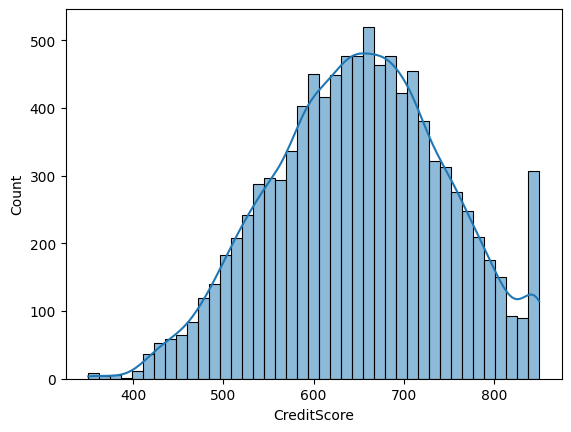

In [ ]:
sns.histplot(df['CreditScore'],kde=True)
plt.show()

In [ ]:
df['CreditScore'].sort_values(ascending=False)

,CreditScore
9931,850
38,850
4,850
9949,850
3225,850
...,...
1631,350
1838,350
8723,350
8762,350


In [ ]:
df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male'],
      dtype='object')

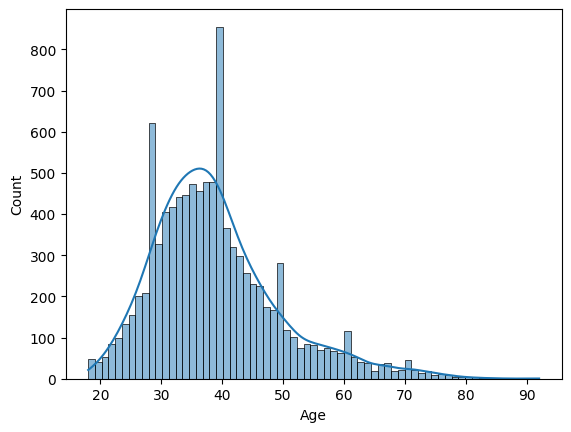

In [ ]:
sns.histplot(df['Age'],kde=True)
plt.show()

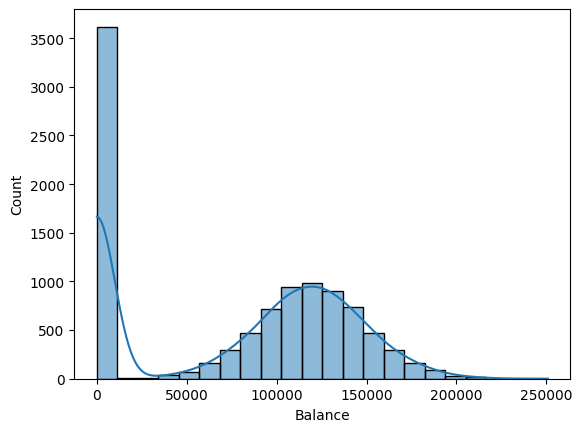

In [ ]:
sns.histplot(df['Balance'],kde=True)
plt.show()

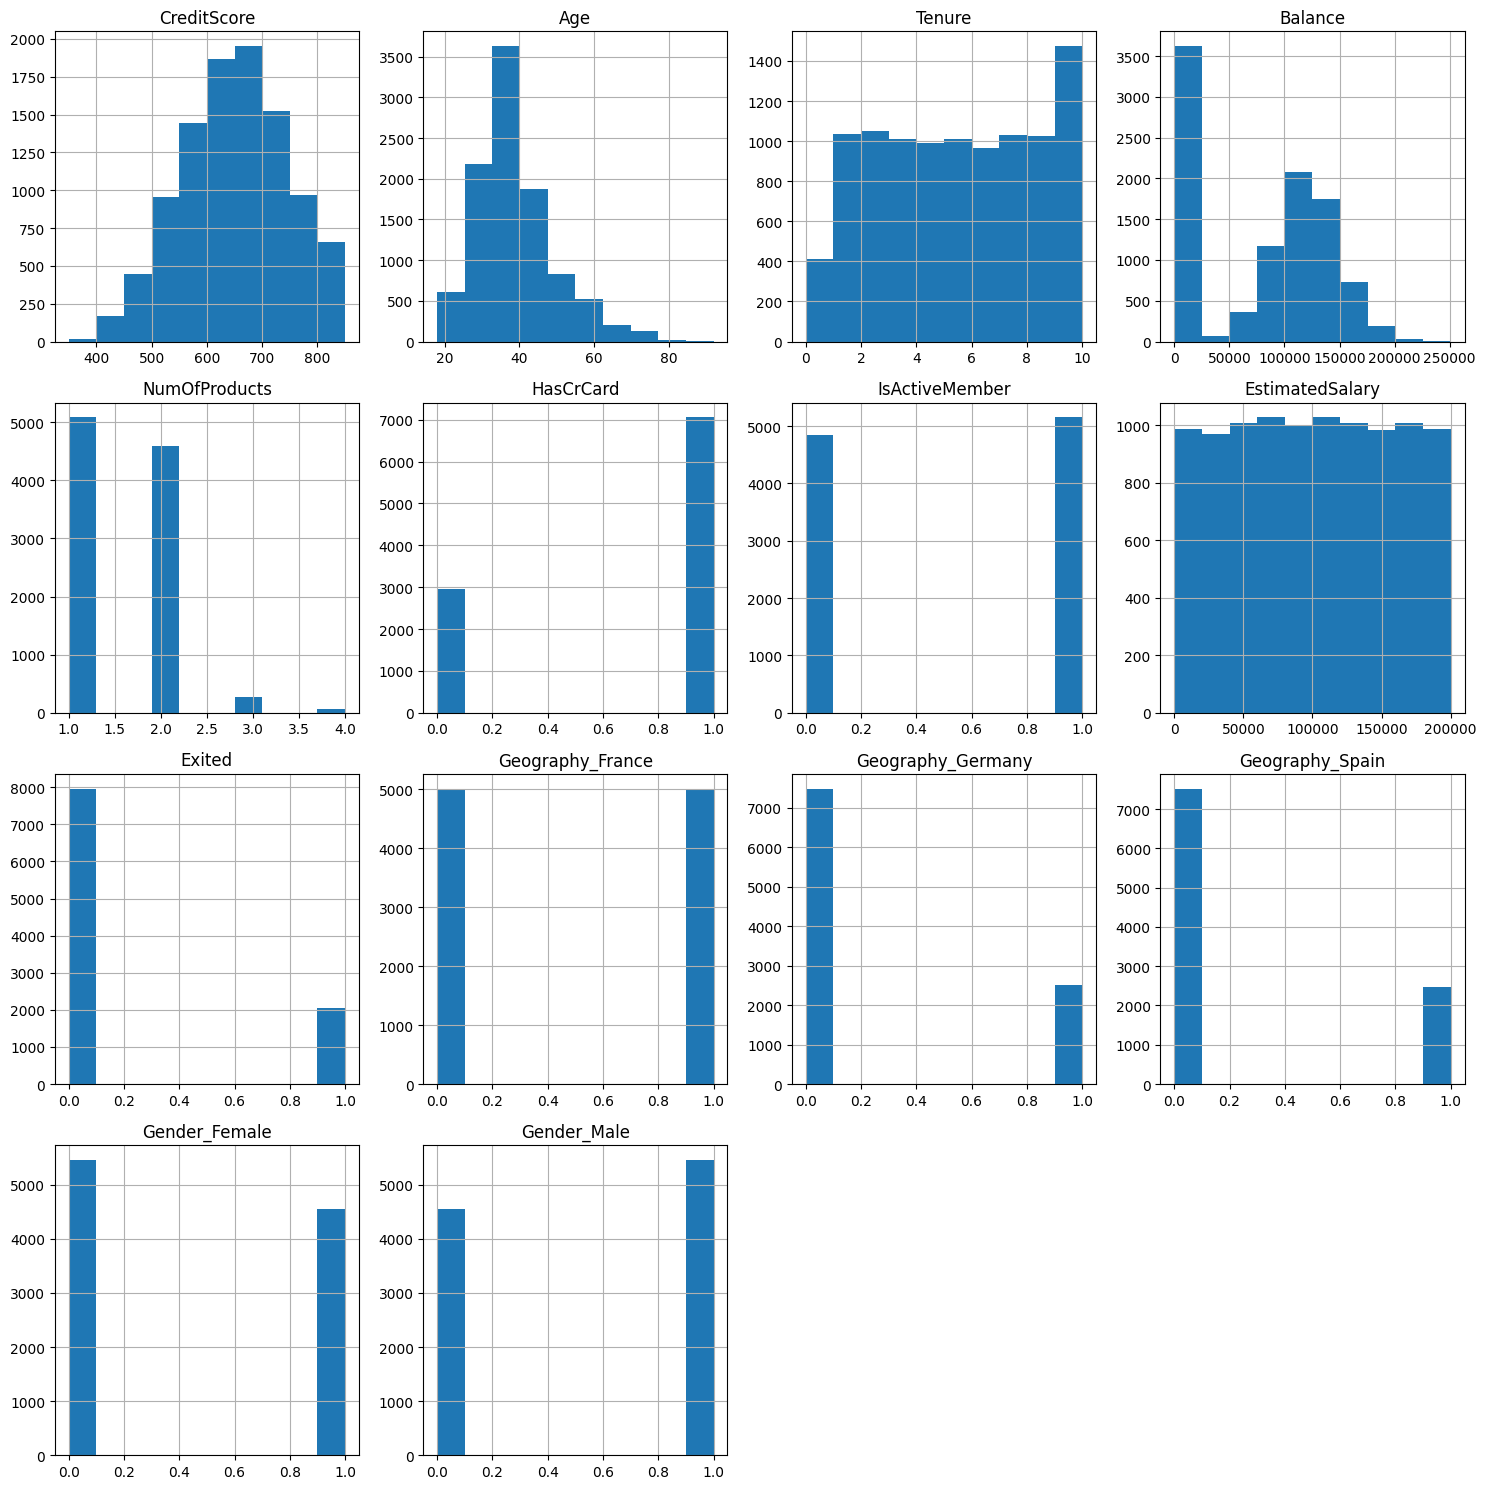

In [ ]:
df.hist(figsize=(15,15))
plt.tight_layout()
plt.show()

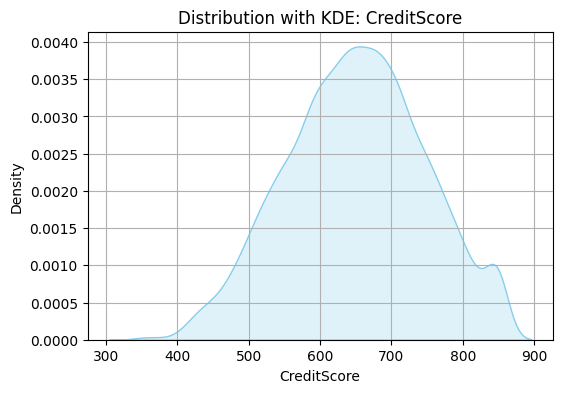

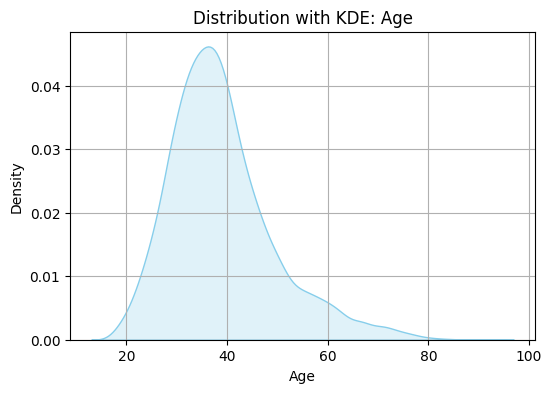

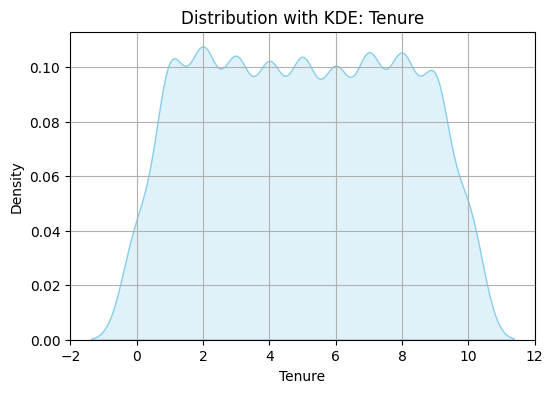

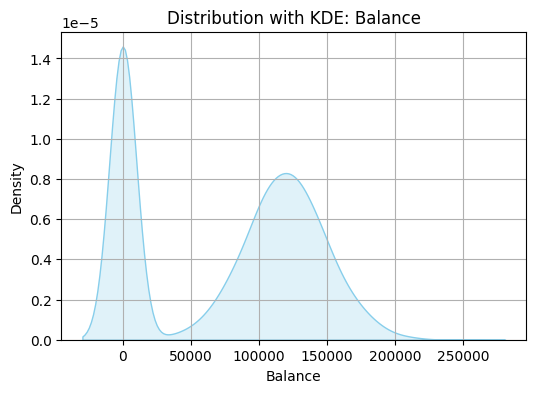

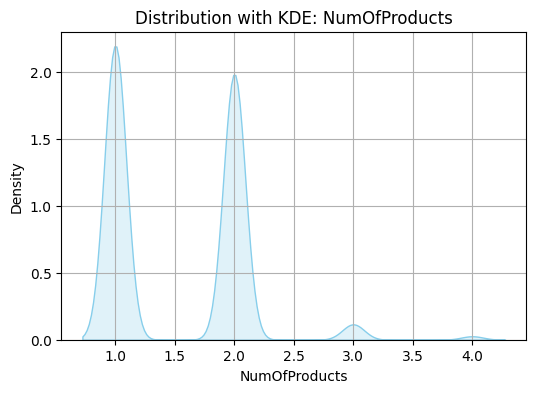

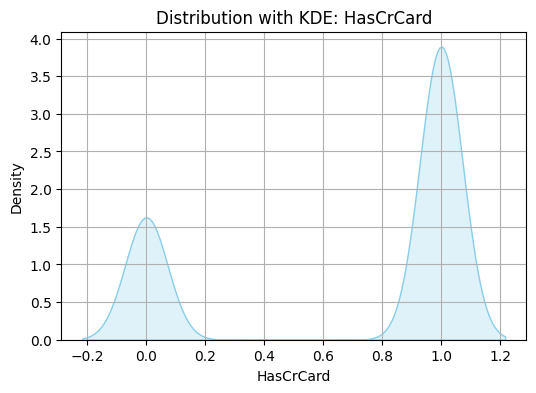

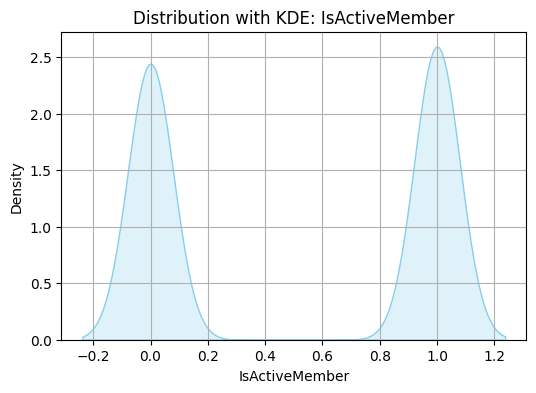

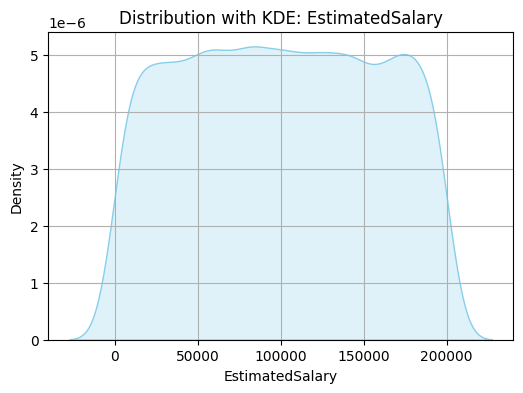

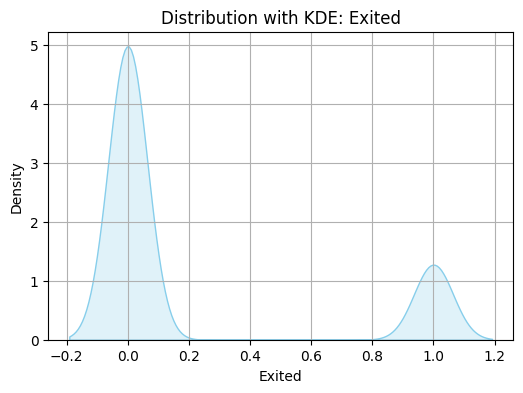

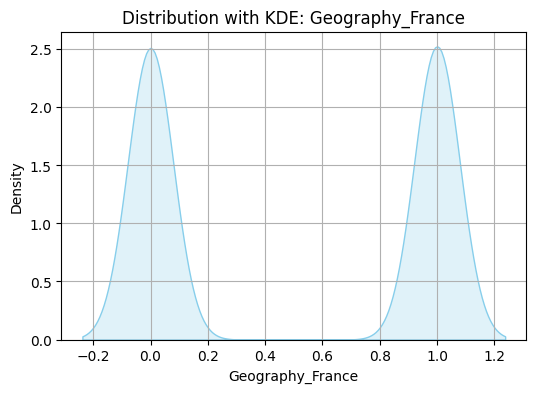

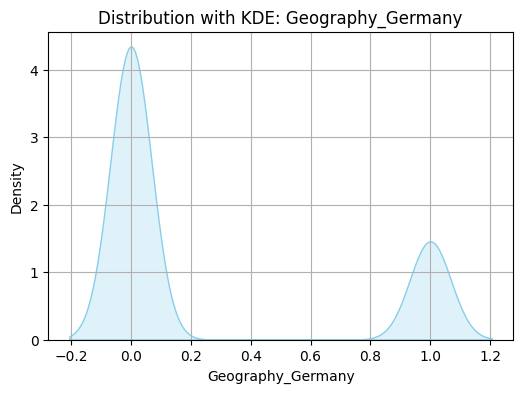

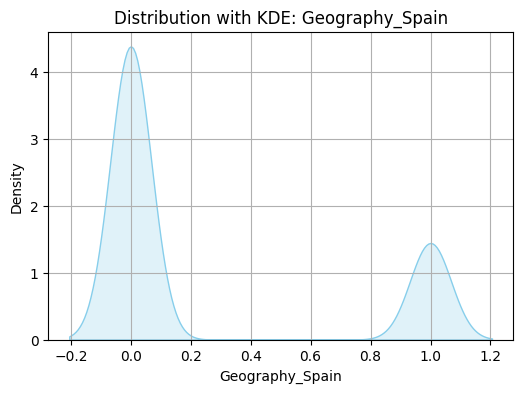

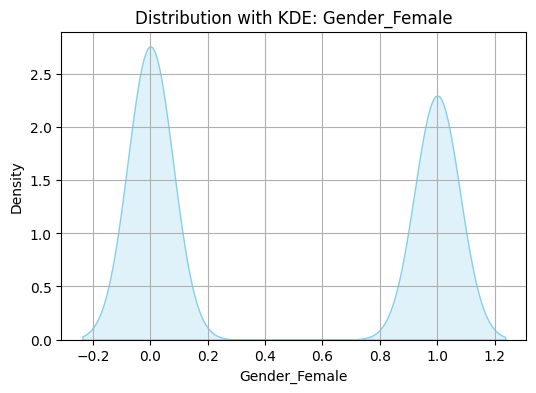

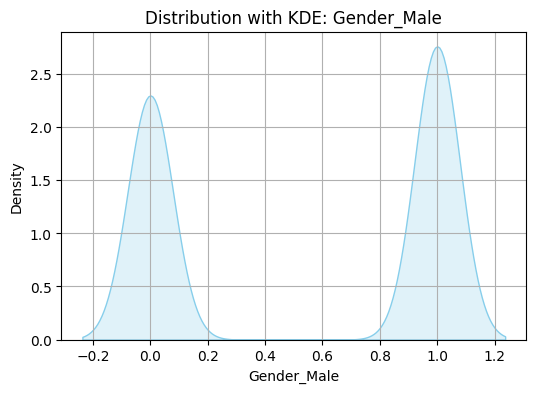

In [ ]:
numerical_cols = df.select_dtypes(include='number').columns
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.kdeplot(data=df, x=col, fill=True, color='skyblue')
    plt.title(f'Distribution with KDE: {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.grid(True)
    plt.show()

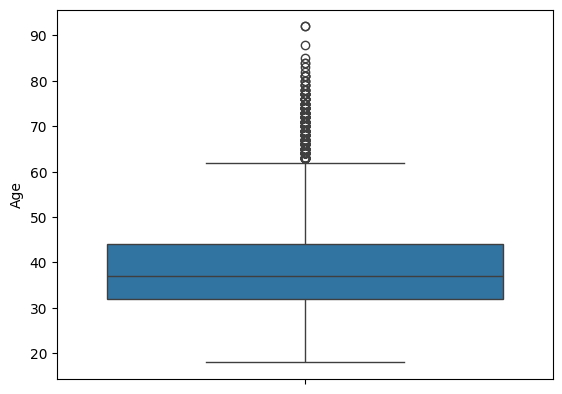

In [ ]:
sns.boxplot(data=df['Age'])
plt.show()

In [ ]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [ ]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


In [ ]:
X=df.drop('Exited',axis=1)
Y=df['Exited']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=42)
print('X_train_shape',X_train.shape)
print('X_test_shape',X_test.shape)
print('Y_train_shape',Y_train.shape)
print('Y_test_shape',Y_test.shape)

X_train_shape (8000, 13)
X_test_shape (2000, 13)
Y_train_shape (8000,)
Y_test_shape (2000,)


# **APPLYING SMOTE**

In [ ]:
from google.colab import files
smote = SMOTE(random_state=42)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)
resampled_df = pd.DataFrame(X_train_resampled, columns=X_train.columns)
resampled_df['Exited'] = Y_train_resampled.values
resampled_df.to_csv('churn.csv', index=False)
files.download('churn.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


# **CHURN PREDICTION DATASET (AFTER SMOTE)**

In [ ]:
df1=pd.read_csv('/content/churn_smote.csv')

In [ ]:
df1.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Exited
0,753,57,7,0.00,1,1,0,159475.08,1,0,0,0,1,1
1,739,32,3,102128.27,1,1,0,63981.37,0,1,0,0,1,1
2,755,37,0,113865.23,2,1,1,117396.25,0,1,0,1,0,0
3,561,37,5,0.00,2,1,0,83093.25,1,0,0,0,1,0
4,692,49,6,110540.43,2,0,1,107472.99,0,1,0,0,1,0


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12740 entries, 0 to 12739
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        12740 non-null  int64  
 1   Age                12740 non-null  int64  
 2   Tenure             12740 non-null  int64  
 3   Balance            12740 non-null  float64
 4   NumOfProducts      12740 non-null  int64  
 5   HasCrCard          12740 non-null  int64  
 6   IsActiveMember     12740 non-null  int64  
 7   EstimatedSalary    12740 non-null  float64
 8   Geography_France   12740 non-null  int64  
 9   Geography_Germany  12740 non-null  int64  
 10  Geography_Spain    12740 non-null  int64  
 11  Gender_Female      12740 non-null  int64  
 12  Gender_Male        12740 non-null  int64  
 13  Exited             12740 non-null  int64  
dtypes: float64(2), int64(12)
memory usage: 1.4 MB


In [ ]:
df1['Exited'].value_counts()

,count
Exited,
1,6370
0,6370


In [ ]:
X=df1.drop('Exited',axis=1)
Y=df1['Exited']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=42)
print('X_train_shape',X_train.shape)
print('X_test_shape',X_test.shape)
print('Y_train_shape',Y_train.shape)
print('Y_test_shape',Y_test.shape)

X_train_shape (10192, 13)
X_test_shape (2548, 13)
Y_train_shape (10192,)
Y_test_shape (2548,)


# **DATA EVALUATION (KNN)**

In [ ]:
for k in range(1,21):
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,Y_train)
  y_pred=knn.predict(X_test)
  print(k,accuracy_score(Y_test,y_pred))

1 0.7005494505494505
2 0.6801412872841445
3 0.6860282574568289
4 0.6793563579277865
5 0.6773940345368917
6 0.6773940345368917
7 0.6715070643642073
8 0.6667974882260597
9 0.6652276295133438
10 0.6652276295133438
11 0.6597331240188383
12 0.6573783359497645
13 0.6510989010989011
14 0.6456043956043956
15 0.6463893249607535
16 0.6436420722135008
17 0.6448194662480377
18 0.6393249607535322
19 0.640502354788069
20 0.6357927786499215


In [ ]:
knn=KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,Y_train)
y_pred=knn.predict(X_test)
print(accuracy_score(Y_test,y_pred))
print(confusion_matrix(Y_test,y_pred))
print(classification_report(Y_test,y_pred))

0.6773940345368917
[[844 430]
 [392 882]]
              precision    recall  f1-score   support

           0       0.68      0.66      0.67      1274
           1       0.67      0.69      0.68      1274

    accuracy                           0.68      2548
   macro avg       0.68      0.68      0.68      2548
weighted avg       0.68      0.68      0.68      2548



# **(DECISION TREE)**

In [ ]:
dec_tree=DecisionTreeClassifier()
dec_tree.fit(X_train,Y_train)
y_pred=dec_tree.predict(X_test)
print(accuracy_score(Y_test,y_pred))
print(confusion_matrix(Y_test,y_pred))
print(classification_report(Y_test,y_pred))

0.8371271585557299
[[1040  234]
 [ 181 1093]]
              precision    recall  f1-score   support

           0       0.85      0.82      0.83      1274
           1       0.82      0.86      0.84      1274

    accuracy                           0.84      2548
   macro avg       0.84      0.84      0.84      2548
weighted avg       0.84      0.84      0.84      2548



# **(LOGISTIC REGRESSION)**

In [ ]:
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print(accuracy_score(Y_test,y_pred))
print(confusion_matrix(Y_test,y_pred))
print(classification_report(Y_test,y_pred))

0.6671899529042387
[[840 434]
 [414 860]]
              precision    recall  f1-score   support

           0       0.67      0.66      0.66      1274
           1       0.66      0.68      0.67      1274

    accuracy                           0.67      2548
   macro avg       0.67      0.67      0.67      2548
weighted avg       0.67      0.67      0.67      2548



# **(RANDOM FOREST)**

In [ ]:
rand_for=RandomForestClassifier()
rand_for.fit(X_train,Y_train)
y_pred=rand_for.predict(X_test)
print(accuracy_score(Y_test,y_pred))
print(confusion_matrix(Y_test,y_pred))
print(classification_report(Y_test,y_pred))

0.8948194662480377
[[1167  107]
 [ 161 1113]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      1274
           1       0.91      0.87      0.89      1274

    accuracy                           0.89      2548
   macro avg       0.90      0.89      0.89      2548
weighted avg       0.90      0.89      0.89      2548



# **HYPERPARAMETER TUNING**

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=2
)
grid_search.fit(X_train, Y_train)
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
from sklearn.metrics import classification_report, confusion_matrix

y_pred = best_model.predict(X_test)
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test,y_pred))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
[[1173  101]
 [ 167 1107]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      1274
           1       0.92      0.87      0.89      1274

    accuracy                           0.89      2548
   macro avg       0.90      0.89      0.89      2548
weighted avg       0.90      0.89      0.89      2548



In [ ]:
param_grid={
    'C':[0.001,0.01,0.1,1,10,100,1000]
}
grid_search=GridSearchCV(
    estimator=LogisticRegression(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=2
)
grid_search.fit(X_train,Y_train)
print("Best Parameters:",grid_search.best_params_)
best_model=grid_search.best_estimator_
y_pred=best_model.predict(X_test)
print(confusion_matrix(Y_test,y_pred))
print(classification_report(Y_test,y_pred))

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Parameters: {'C': 0.01}
[[887 387]
 [426 848]]
              precision    recall  f1-score   support

           0       0.68      0.70      0.69      1274
           1       0.69      0.67      0.68      1274

    accuracy                           0.68      2548
   macro avg       0.68      0.68      0.68      2548
weighted avg       0.68      0.68      0.68      2548



In [ ]:
param_grid={
    'max_depth':[3,5,8],
    'min_samples_leaf':[1,2,3,4,5],
    'min_samples_split':[2,5,10,15,]
}
grid_search=GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=2
)
grid_search.fit(X_train,Y_train)
print("Best Parameters:",grid_search.best_params_)
best_model=grid_search.best_estimator_
y_pred=best_model.predict(X_test)
print(confusion_matrix(Y_test,y_pred))
print(classification_report(Y_test,y_pred))

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best Parameters: {'max_depth': 8, 'min_samples_leaf': 5, 'min_samples_split': 2}
[[1086  188]
 [ 204 1070]]
              precision    recall  f1-score   support

           0       0.84      0.85      0.85      1274
           1       0.85      0.84      0.85      1274

    accuracy                           0.85      2548
   macro avg       0.85      0.85      0.85      2548
weighted avg       0.85      0.85      0.85      2548



# **FEATURE ENGINEERING (FEATURE SELECTION)**

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif


k_best_selector = SelectKBest(score_func=f_classif, k=7)
X_train_kbest = k_best_selector.fit_transform(X_train, Y_train)
X_test_kbest = k_best_selector.transform(X_test)


selected_features = X_train.columns[k_best_selector.get_support()]
print("Selected Features:", selected_features.tolist())


Selected Features: ['Age', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Geography_France', 'Geography_Spain', 'Gender_Male']


# **TUNING (WITH SELECTED FEATURES)**

In [ ]:
param_grid = {
    'max_depth': [3, 5, 8],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'min_samples_split': [2, 5, 10, 15]
}

# GridSearch on reduced feature set
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train_kbest, Y_train)

# Evaluate
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_kbest)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test,y_pred))

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[[1053  221]
 [ 216 1058]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1274
           1       0.83      0.83      0.83      1274

    accuracy                           0.83      2548
   macro avg       0.83      0.83      0.83      2548
weighted avg       0.83      0.83      0.83      2548



In [ ]:
df1.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Exited
0,753,57,7,0.00,1,1,0,159475.08,1,0,0,0,1,1
1,739,32,3,102128.27,1,1,0,63981.37,0,1,0,0,1,1
2,755,37,0,113865.23,2,1,1,117396.25,0,1,0,1,0,0
3,561,37,5,0.00,2,1,0,83093.25,1,0,0,0,1,0
4,692,49,6,110540.43,2,0,1,107472.99,0,1,0,0,1,0


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train_scaled, Y_train)
y_pred_knn = knn.predict(X_test_scaled)

print("KNN Accuracy:", accuracy_score(Y_test, y_pred_knn))
print(confusion_matrix(Y_test, y_pred_knn))
print(classification_report(Y_test,y_pred_knn))

KNN Accuracy: 0.8653846153846154
[[1178   96]
 [ 247 1027]]
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1274
           1       0.91      0.81      0.86      1274

    accuracy                           0.87      2548
   macro avg       0.87      0.87      0.86      2548
weighted avg       0.87      0.87      0.86      2548



In [ ]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, Y_train)
y_pred_lr = log_reg.predict(X_test_scaled)

print("Logistic Regression Accuracy:", accuracy_score(Y_test, y_pred_lr))
print(confusion_matrix(Y_test, y_pred_lr))
print(classification_report(Y_test,y_pred_lr))

Logistic Regression Accuracy: 0.8504709576138147
[[1157  117]
 [ 264 1010]]
              precision    recall  f1-score   support

           0       0.81      0.91      0.86      1274
           1       0.90      0.79      0.84      1274

    accuracy                           0.85      2548
   macro avg       0.86      0.85      0.85      2548
weighted avg       0.86      0.85      0.85      2548



In [ ]:
print("KNN ROC-AUC:", roc_auc_score(Y_test, knn.predict_proba(X_test_scaled)[:,1]))
print("LogReg ROC-AUC:", roc_auc_score(Y_test, log_reg.predict_proba(X_test_scaled)[:,1]))

KNN ROC-AUC: 0.9375263388775388
LogReg ROC-AUC: 0.9190863520870247


In [ ]:
X_train_kbest_scaled = scaler.fit_transform(X_train_kbest)
X_test_kbest_scaled = scaler.transform(X_test_kbest)

knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train_kbest_scaled, Y_train)
y_pred_knn = knn.predict(X_test_kbest_scaled)
y_prob_knn = knn.predict_proba(X_test_kbest_scaled)[:, 1]

print("KNN ROC-AUC:", roc_auc_score(Y_test, y_prob_knn))
print(classification_report(Y_test,y_pred_knn))

KNN ROC-AUC: 0.8907894639560932
              precision    recall  f1-score   support

           0       0.78      0.86      0.82      1274
           1       0.85      0.76      0.80      1274

    accuracy                           0.81      2548
   macro avg       0.82      0.81      0.81      2548
weighted avg       0.82      0.81      0.81      2548



In [ ]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_kbest_scaled, Y_train)
y_pred_lr = log_reg.predict(X_test_kbest_scaled)
y_prob_lr = log_reg.predict_proba(X_test_kbest_scaled)[:, 1]

print("Logistic Regression ROC-AUC:", roc_auc_score(Y_test, y_prob_lr))
print(classification_report(Y_test,y_pred_lr))

Logistic Regression ROC-AUC: 0.888244912745922
              precision    recall  f1-score   support

           0       0.81      0.82      0.82      1274
           1       0.82      0.81      0.81      1274

    accuracy                           0.82      2548
   macro avg       0.82      0.82      0.82      2548
weighted avg       0.82      0.82      0.82      2548



# **BEST MODEL**

In [ ]:
df3=pd.read_csv('/content/churn_smote.csv')
df3.drop(df[['CreditScore','EstimatedSalary','Balance','Tenure','Gender_Female','Geography_Germany']],axis=1,inplace=True)


In [ ]:
X=df3.drop('Exited',axis=1)
Y=df3['Exited']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=42)
param_grid = {
    'max_depth': [3, 5, 8],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'min_samples_split': [2, 5, 10, 15]
}
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, Y_train)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test,y_pred))
print("Best Parameters:",grid_search.best_params_)


Fitting 5 folds for each of 60 candidates, totalling 300 fits
[[1053  221]
 [ 216 1058]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1274
           1       0.83      0.83      0.83      1274

    accuracy                           0.83      2548
   macro avg       0.83      0.83      0.83      2548
weighted avg       0.83      0.83      0.83      2548

Best Parameters: {'max_depth': 8, 'min_samples_leaf': 5, 'min_samples_split': 15}


In [ ]:
model=DecisionTreeClassifier(max_depth=8,min_samples_leaf=5,min_samples_split=15)
X=df3.drop('Exited',axis=1)
y=df3['Exited']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)
model.fit(X_train,y_train)
new_data=np.array([[42,2,1,0,0,0,1]])
feature_names=X.columns
new_data=pd.DataFrame(new_data.reshape(1,-1),columns=feature_names)
model.predict(new_data)

array([1])

# **PREDICTION**

In [ ]:
new_customers = np.array([
    [52, 1, 0, 0, 0, 1, 0], #customer who churn
    [30, 2, 1, 1, 1, 0, 1], #customer who didn't churn
])
new_customers = pd.DataFrame(new_customers, columns=feature_names)
predictions = model.predict(new_customers)
print(predictions)

[1 0]


# **SAVING MODEL USING PICKLE**

In [ ]:
import pickle
with open('churn prediction.pkl','wb')as file:
  pickle.dump(model,file)

In [ ]:
files.download('churn prediction.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>